## Geospatial problem set 1

<u>Generally, only write answers where indicated. Your code goes in places #YOUR CODE GOES HERE and text goes in places YOUR DISCUSSION GOES HERE, and do not change anything else.</u> The code should be readable and compact. It is assessed by programming practice marking criteria. Discussion should adhere to word limits; 1-2 references may be added (not included in word limit) if they meaningfully contribute to discussion.

### Question 1

**Part 1.1** Complete the code for function *min_distance()* to compute the minimum distance between a list of x,y points. (2 marks)

Hint: Use basic distance calculation, i.e. <i>dist = math.sqrt((x2 - x1)\*\*2 + (y2 - y1)\*\*2)</i>

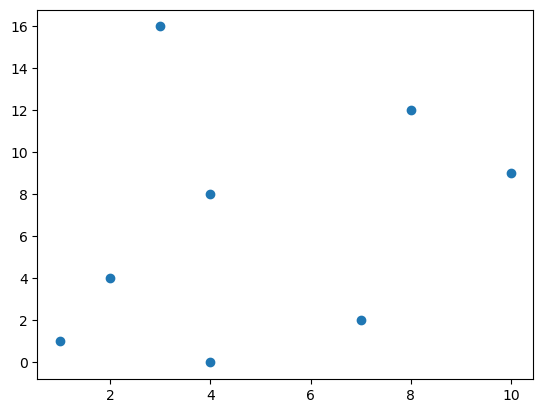

In [3]:
# Test set of points; assume xs,ys lists are same length
%matplotlib inline
import matplotlib.pyplot as plt
xs = [1.0, 7.0, 2.0, 10.0, 3.0, 4.0, 8.0,  4.0] 
ys = [1.0, 2.0, 4.0, 9.0, 16.0, 0.0, 12.0, 8.0]

plt.scatter(xs, ys)

In [4]:
# find the minimum distance between a set of x,y pairs
import math

# Compute the minimum distance between points given as lists of x,y ordinates. 
# Return the indices of closest pair and minimum distance 
def min_distance(xs,ys):
    # assume inputs xs,ys are lists of same length
    # start with a high number as min_dist, or set as any arbitrary distance between two points 
    min_dist = 999999
    min_index1 = 0
    min_index2 = 0
    # iterate x,y ordinates to find minimum distance
    # YOUR CODE GOES HERE
    if type(xs) !=list and type(ys) !=list and len(xs) != len(ys):
        return "ERRO! Make Sure xs and ys are lists"
    start_point=1
    # In order make code working when first two points' distance is bigger than initial distance
    if math.sqrt((xs[1]-xs[0])**2 + (ys[1]-ys[0])**2) > min_dist:
        min_dist=math.sqrt((xs[1]-xs[0])**2 + (ys[1]-ys[0])**2)
        min_index1=0
        min_index2=1
        
    for index1 in range(len(xs)-1):
        for index2 in range(start_point,len(xs)):
            dist_tmp=math.sqrt((xs[index2]-xs[index1])**2 + (ys[index2]-ys[index1])**2)
            if dist_tmp < min_dist:
                min_dist=dist_tmp
                min_index1=index1
                min_index2=index2
            else:
                continue
        start_point +=1
 

        
    return(min_index1, min_index2, min_dist)

index1,index2,dist = min_distance(xs,ys)
print("Closest ordinates {},{} with distance: {}".format(index1,index2,dist))

Closest ordinates 0,2 with distance: 3.1622776601683795


**Part 1.2** Describe two <u>informal specifications </u> (may be a requirement or an assumption) for the *min_distance()* function. (100 words, 3 marks)

Code should produce expected outputs for data inputs; this may be specified as input *requirements* and output *assumptions*. For instance, code comments state that the required input is *lists of x,y ordinates of same size*, but further requirements could be stated about inputs for proper use of the function. Code assumptions say what you can assume about the output given valid inputs. Note there is no perfect solution, the main thing is to make people aware of the proper use and output of your function.

Consider the problem and its coding, and see if you can think of cases for different data inputs where *min_distance()* potentially returns an incorrect, misleading or ambiguous output. These can be handled by doing: i) checks in your code, ii) output messages, or iii) informally where you state (as comments) the data input requirements and output assumptions. <u>Do the later (i.e. informal comments); no need to do it in code</u>.

YOUR DISCUSSION GOES HERE (110 word limit)

### Answer
1. The distance between first two points is smaller than the initial min_dist. If the distance between first two points is bigger than the initail min_dist, the code will meet bug (Has been fixed in the code above). Because if all of the distances are bigger than first two points, and the first two points' distance is bigger than the initial min_dist, the code will not find the correct min_dist.
2. Assume all of the elements in the input x and y list are number (Int, float,long,double,etc..) not string (or characters)


---
### Question 2 
You are given data for a hypothetical train survey on passenger addresses (a suburb) and travel time (minutes) for rail journey (*tt_rail*), and journey from station to work place (*tt_work*). But the data has inconsistencies and missing values.
<img src="https://shire.science.uq.edu.au/Geospatial/GEOM3005_7004/images/pic_rail_survey.png" alt="Rail survey data" width="400"></img>

In [1]:
# read the data from csv file
import pandas as pd
survey_data = pd.read_csv("https://uqmaps.maps.arcgis.com/sharing/rest/content/items/2ce2a8c9b88b4ee4a6c3ae9d1a11f30f/data")
survey_data

,suburb,tt_rail,tt_work
0,East,20.0,NaN
1,NORTH,25.0,15.0
2,East,30.0,40.0
3,SOUTH,20.0,10.0
4,North,NaN,15.0
5,West,20.0,15.0
6,Nth,20.0,25.0
7,South,10.0,20.0
8,East,30.0,20.0
9,WEST,NaN,40.0


#### Complete the 3 parts below to 'clean' the survey_data:

1. Compute summary count and mean of travel times (tt_rail, tt_work) by suburb; notice problems for the suburb names.<br />
2. Write code to 'clean' suburb names in survey_data, and redo summary.<br />
3. Write code to 'clean' the survey_data to fix missing travel times values with an approach you choose, and redo summary. 

**Part 2.1** Compute a preliminary summary (1 mark)

Use Pandas groupby on 'suburb' and compute aggregate count and mean for *tt_rail* and *tt_work* data

In [2]:
# Use pandas groupby and agg to get count and mean for tt_rail,tt_work

# YOUR CODE GOES HERE, i.e. replace None with code to compute means by suburb
resultV1=survey_data.groupby(by='suburb',as_index=False).aggregate(
                                            {'tt_rail':['count','mean'],
                                             "tt_work":['count','mean']})





summary_survey_data = resultV1
summary_survey_data

suburb tt_rail        tt_work           
           count   mean   count       mean
0   EAST       1  30.00       1  10.000000
1   East       4  30.00       3  21.666667
2  NORTH       1  25.00       1  15.000000
3  North       1  40.00       2  15.000000
4    Nth       1  20.00       1  25.000000
5  SOUTH       1  20.00       1  10.000000
6  South       1  10.00       1  20.000000
7    Sth       1  10.00       1  10.000000
8   WEST       0    NaN       1  40.000000
9   West       4  18.75       4  27.500000

**Part 2.2** You notice suburb names vary, and could be 'cleaned' to use consistent names. (2 marks)

Clean the suburb names by:
- Captalizing names 
- Substituting abbreviated names to full name using the Python dictionary *survey_suburb_abbrevations* to make corrections

In [3]:
# common abbreviations used to identify (by the key) an abreviated term and the substiture(value)
survey_suburb_abbrevations = {'Nth':'North', 'Est':'East', 'Wst':'West', 'Sth':'South'}

# YOUR CODE GOES HERE, i.e. essentially fix the suburbs in survey_data 

# to consistent names and do summary again of count and mean for tt_rail,tt_work
survey_data_modify_suburb=survey_data.copy(deep=True)

#Modify all suburb name and Capitalize first letter
survey_data_modify_suburb["suburb"]=survey_data.replace(survey_suburb_abbrevations)["suburb"].str.capitalize()




resultV2=survey_data_modify_suburb.groupby(by='suburb',as_index=False).aggregate(
                                            {'tt_rail':['count','mean'],
                                             "tt_work":['count','mean']})



summary_survey_data2=resultV2
summary_survey_data2

suburb tt_rail            tt_work           
           count       mean   count       mean
0   East       5  30.000000       4  18.750000
1  North       3  28.333333       4  17.500000
2  South       3  13.333333       3  13.333333
3   West       4  18.750000       5  30.000000

**Part 2.3**  Fix missing values for travel times, i.e. null values in dataframe (3 marks)

Missing values occur when survey respondents miss entering data. There are different strategies to fix missing values; these range from: remove rows with null values, fill in values with a column average or one based on the suburbs. 

Write code to fix the survey data, and discuss the strategy used.

YOUR DISCUSSION GOES HERE on interpretation the strategy used (60 words limit).

In [4]:
# YOUR CODE GOES HERE, i.e. essentially fix missing data in survey_data and do summary again
#`import pandas as pd`
import pandas as pd
import numpy as np

#specialized knn algorithm for this question and calcuate mean
###################################################################################################################################################
class KNN:
    def __init__(self, data: pd.DataFrame) -> None:
        self.__data = data.copy(deep=True)

    def Locate_Missing(self) -> list(tuple()):
        check_df = np.array(self.__data.isna())
        missing_value_position = np.where(check_df == True)
        missing_value_point=np.array(list(zip(missing_value_position[0],missing_value_position[1])))
        return missing_value_point
      
    #Find K-neighbor, calculate weight mean and fill na
    #method->distance calculate method, in this condition only proive euclidean distance, but you can define you costumized method 
    #and set method="YOUR METHOD FUNCTION NAME"
    #target_row is the row index number of missing values
    
    #euclidean-> sqrt(sum(abs((xn-x0))^2))
    def __euclidean(self,target_row:int,target_col:list,kNeighbor:int):
        train_dataset=pd.concat([self.__data.iloc[:target_row,:],self.__data.iloc[(target_row+1):,:]])
        train_dataset=train_dataset.dropna().iloc[:,target_col]
        target=self.__data.iloc[target_row,target_col]
        try:
            dim=target.shape[1]
            axis=1
        except:
            axis=0
        if axis == 0:
            distance_arr = abs(train_dataset-target)
        else:
            distance_arr = np.sqrt(np.sum(abs(train_dataset-target)**2,axis=1))
        #sort distance_arr to find nearest neighbors
        
        distance_list=distance_arr.sort_values(by=distance_arr.columns[0])[:kNeighbor].index.to_list()
        return distance_list    
    
    def Cal_Fill(self,method="Euclidean",kNeighbor=2):       
        missing_points=self.Locate_Missing()
        rows=set(missing_points[:,0])
        for row in rows:
            col_cal=[]
            col_cal_fill=[]
            cols=list(missing_points[missing_points[:,0] == row][:,1])         
            for col in range(len(self.__data.columns)):
                if col in cols:
                    col_cal_fill.append(col)
                else:
                    col_cal.append(col)
            #The dataset for calculating the distance
            if method == "Euclidean":
                distance_list=self.__euclidean(target_row=row,target_col=col_cal,kNeighbor=kNeighbor)
                
                #Mean
                for c in col_cal_fill:   
                    mean=sum(self.__data.loc[distance_list,self.__data.columns[c]])/kNeighbor
                    #Fill Nan
                    self.__data.iloc[row,c]=mean
            else:
                print("ADD YOUR DISTANCE CALCULATION FUNCTION TO HERE")
                return -1
        return self.__data
###################################################################################################################################################

#Divide Dataset by suburb name and then fill Nan by group
#['East','North','West'] , South no Nan
survey_data_fix_missing=survey_data_modify_suburb.copy(deep=True)


East=survey_data_fix_missing[survey_data_fix_missing['suburb']=='East']
East_fill=KNN(East.iloc[:,[1,2]])
East_fill=East_fill.Cal_Fill()
East=pd.concat([East.iloc[:,0],East_fill],axis=1)



North=survey_data_fix_missing[survey_data_fix_missing['suburb']=='North']
North_fill=KNN(North.iloc[:,[1,2]])
North_fill=North_fill.Cal_Fill()
North=pd.concat([North.iloc[:,0],North_fill],axis=1)

#South
South=survey_data_fix_missing[survey_data_fix_missing['suburb']=='South']

# #West
West=survey_data_fix_missing[survey_data_fix_missing['suburb']=='West']
West_fill=KNN(West.iloc[:,[1,2]])
West_fill=West_fill.Cal_Fill()
West=pd.concat([West.iloc[:,0],West_fill],axis=1)


survey_data_fix_missing=pd.concat([East,North,South,West]).reset_index(drop=True)
###################################################################################################################################################
#Result



resultV3=survey_data_fix_missing.groupby(by='suburb',as_index=False).aggregate(
                                            {'tt_rail':['count','mean'],
                                             "tt_work":['count','mean']})



summary_survey_data3=resultV3
summary_survey_data3

suburb tt_rail            tt_work           
           count       mean   count       mean
0   East       5  30.000000       5  21.000000
1  North       4  29.375000       4  17.500000
2  South       3  13.333333       3  13.333333
3   West       5  19.000000       5  30.000000

### Discussing about interpolation (filling the missing values)
In the this question, the dataset is vary small only 16 rows, and 3 columns, it is not fit for using supervised machine learning interpolation methods such as ANN. And after I test the dataset, I find that the graph of data is not a strainght line, therefore the simple linear regression method might not has a good performance this dataset (maybe high order polynomial interpolation, or cubic interpolation can have a good performance, I didn't test them). However, some unsupervised machine learning method can be applied in order to fill the missing value in this dataset, such as **Random Forest** and **KNN**. 

In this case, I choose **KNN** to fill the missing value, becasue it is a simply method and can be applied in small scale dataset, which doesn't need training data. And another reason why I choosing KNN is that without using other machine learning python library (such as sklearn), KNN can be easily implemented only base on **Numpy** and **Pandas**. The distance method I choose euclidean distance (the equation below can calculate this distance), and the hyperparameter the number of K-neighbors is 2. 

$$\text{Euclidean Distatnce}(x_i,x_j) = \sqrt{\sum_{u=1}^{d} (x_{iu}-x_{ju})^2}$$

In order to fill the missing values in the dataset, I divid the dataset into four groups by their suburb name. Now, we have four groups ['East','North','South','West'], and then using KNN interpolation method to fill the missing values one by one. In the end, using Pandas.concat to combine these four group into one Pandas.DataFrame.



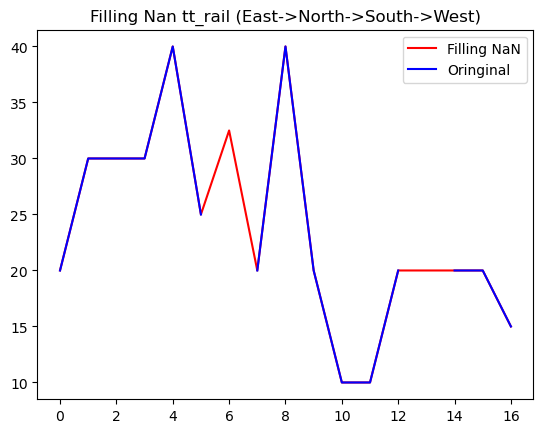

In [5]:
import matplotlib.pyplot as plt
plt.plot(survey_data_fix_missing["tt_rail"],c='r',label="Filling NaN")
E=survey_data_modify_suburb[survey_data_modify_suburb['suburb']=='East']
N=survey_data_modify_suburb[survey_data_modify_suburb['suburb']=='North']
S=survey_data_modify_suburb[survey_data_modify_suburb['suburb']=='South']
W=survey_data_modify_suburb[survey_data_modify_suburb['suburb']=='West']
c=pd.concat([E,N,S,W]).reset_index(drop=True)
plt.plot(c['tt_rail'],c='b',label="Oringinal")
plt.title("Filling Nan tt_rail (East->North->South->West)")
plt.legend()


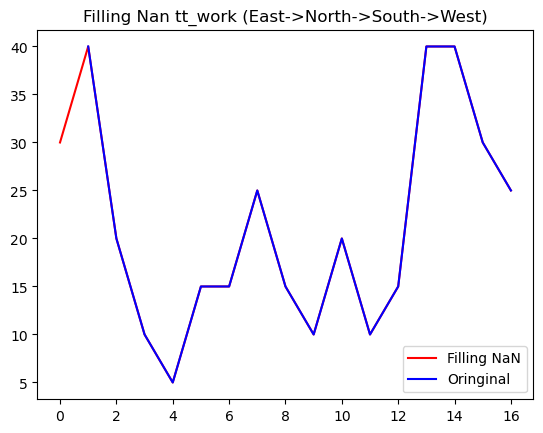

In [6]:
plt.plot(survey_data_fix_missing["tt_work"],c='r',label="Filling NaN")
plt.plot(c['tt_work'],c='b',label="Oringinal")
plt.title("Filling Nan tt_work (East->North->South->West)")
plt.legend()

### Question 3 - Delineating cities


The Geospatial Practical on Geopandas involved a problem to spatially define the extent of Australian capitals in two ways by: i) administratively defined service region for greater city areas, and ii) metropolitan region which incorporates a main urban area and nearby minor urban areas.

The notebook *Geospatial_geopandas.ipynb* was used to do the analysis. The main geospatial data and analysis instructional tasks were: 
1. Read and display ABS data
2. Create the administrative areas for greater city capitals
3. View urban areas within vicinity of the city capitals

These tasks are given in condensed form in the code cells below to get started.

Compete the the following tasks for assessment.
1. Make enhancement to use map projection GDA2020 Albers [EPSG:9473](https://epsg.io/9473), and change the buffer distance to an appropriate value in meters. Make the code changes in code cell below and answer question in the markdown cell for Part 3-1. 
2. Complete the practical task (step 4) to spatially aggregate *gdf_ucl_in_gcc_buffer* on the attribute *GCC_NAME21* and display result as map and table with the summed *AREASQKM21* and *Population*. 
3. Combine in a single table the results to compare: i) administrative regions, and ii) metropolitan regions. In a markdown cell provide an interpretation of this comparison.

In [1]:
# Un-comment line below if geopandas are not installed
!pip install geopandas

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 36.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 4.5 MB/s eta 0:00:00:00:01


In [2]:
# 1 Read and display ABS data

import geopandas

# Read the SA2's (2450 polygons, ~6mb)
data_sa2 = "https://shire.science.uq.edu.au/Geospatial/GEOM3005_7004/data/SA2_2021_Country.zip"
gdf_sa2= geopandas.read_file(data_sa2)

# Read the UCL's (231 polygons, ~0.5mb)
data_ucl = "https://shire.science.uq.edu.au/Geospatial/GEOM3005_7004/data/UCL_2021_Country.zip"
gdf_ucl= geopandas.read_file(data_ucl)

In [3]:
# 2 Create the administrative areas for greater city capitals
 
# Make selection of GCC's, and use this to create a subset of SA2's. Also filter columns to just needed data
sel_gcc = gdf_sa2.GCC_NAME21.str.contains('Greater') | gdf_sa2.GCC_NAME21.str.contains('Capital')
gdf_sa2_gcc = gdf_sa2[['GCC_NAME21','geometry','AREASQKM21','Population']]  # dice by column
gdf_sa2_gcc = gdf_sa2_gcc[sel_gcc]    # slice by row

# Administrative result - aggregate the areas by captial GCC
gdf_gcc = gdf_sa2_gcc.dissolve(by='GCC_NAME21', aggfunc='sum')

In [4]:
# 3 View urban areas within vicinity of the city capitals

# Reset the the index so GCC names becomes a normal column
gdf_gcc.reset_index(inplace=True) 
# Compute a buffer around the centroid of each GCC, with a distance of ??? meters, and create new geodataframe
# YOUR CODE GOES HERE, i.e. change the buffer distance

#************************************************************************
#NOTE: IF YOU MEET: `ValueError: cannot insert level_0, already exists` * 
#Please RUN the code from the first cell of this question -> cell[82]   *
#************************************************************************
#reprojection to epsg 9473
gdf_gcc_crs2=gdf_gcc.to_crs(epsg=9473)

gds_buffer = gdf_gcc_crs2.centroid.buffer(50000)
gdf_gcc_buffer = geopandas.GeoDataFrame(gdf_gcc, geometry=gds_buffer)
# Spatially join the UCL table to the buffered GCC table
gdf_ucl_cols = gdf_ucl [['UCL_NAME21','SSR_NAME21','AREASQKM21','Population','geometry']]
gdf_ucl_cols_crs2=gdf_ucl_cols.to_crs(epsg=9473)

gdf_ucl_in_gcc_buffer = gdf_ucl_cols_crs2.sjoin(gdf_gcc_buffer, how="inner", )

**Part 3.1** What distance did you use for buffer the GCC centroids, and discuss why you chose this distance. (1 mark)


### Answer:
The common speed limit in building area and high popularity area is about 50 km/h in Australia, and I think usually people driving is within 1 hour. Therefore the buffer distance is 50 km/h $\times$ 1h =50km
#### Referrence 
https://www.allianz.com.au/car-insurance/articles/speed-limits-and-laws-in-australia.html#:~:text=Under%20these%20rules%3A,100km%2Fh%20in%20rural%20areas

**Part 3.2** Spatially aggregate *gdf_ucl_in_gcc_buffer* on the attribute *GCC_NAME21* and display result as map and summary table (2 marks)

In [11]:
# YOUR CODE GOES HERE
#Filter the UCL's for areas with 10,000 or more people (see attribute SSR_NAME21)
gdf_ucl_in_gcc_buffer_above_10000=gdf_ucl_in_gcc_buffer[gdf_ucl_in_gcc_buffer["SSR_NAME21"] != '5,000 to 9,999']

#The AREASQKM21 and Population in the gdf_ucl_in_gcc_buffer  is the left one after join processing.
report=gdf_ucl_in_gcc_buffer_above_10000.dissolve(by='GCC_NAME21',as_index=False,aggfunc={"AREASQKM21_left":['sum'],                                                                  "Population_left":['sum']})

report["AREASQKM21"]=report.iloc[:,2]
report["Population"]=report.iloc[:,3]
s_report=report[['GCC_NAME21','AREASQKM21','Population']]
s_cols = report[['GCC_NAME21','AREASQKM21','Population','geometry']]
print("This is the summary of gdf_ucl in gcc_buffer above 10,000 or people" )
report

This is the summary of gdf_ucl in gcc_buffer above 10,000 or people


,GCC_NAME21,geometry,"(AREASQKM21_left, sum)","(Population_left, sum)",AREASQKM21,Population
0,Australian Capital Territory,"POLYGON ((1559295.99 -3969493.43, 1558266.172 ...",421.7538,489563,421.7538,489563
1,Greater Adelaide,"MULTIPOLYGON (((624558.919 -3850003.599, 62440...",979.4956,1304127,979.4956,1304127
2,Greater Brisbane,"MULTIPOLYGON (((2067835.758 -3158986.624, 2067...",2026.9222,2281905,2026.9222,2281905
3,Greater Darwin,"POLYGON ((-124086.892 -1302382.792, -123728.28...",240.3244,137228,240.3244,137228
4,Greater Hobart,"MULTIPOLYGON (((1286431.472 -4773796.576, 1286...",237.2630,197474,237.2630,197474
5,Greater Melbourne,"MULTIPOLYGON (((1120853.74 -4249874.289, 11208...",2991.0464,4700487,2991.0464,4700487
6,Greater Perth,"MULTIPOLYGON (((-1513146.953 -3644080.809, -15...",1720.3492,2005481,1720.3492,2005481
7,Greater Sydney,"MULTIPOLYGON (((1765108.885 -3835790.872, 1765...",2273.3494,4722278,2273.3494,4722278


In [12]:
# gdf_ucl_in_gcc_buffer

gdf_ucl_in_gcc_buffer_above_10000
# gdf_sa2_crs2=gdf_sa2.to_crs(epsg=9473)
# # axplot2_sa2s = gdf_sa2_crs2.plot(figsize=(10, 6),color='grey')
# # gdf_gcc_buffer.plot(ax=axplot2_sa2s, color='blue')
# # gdf_ucl_in_gcc_buffer.plot(ax=axplot2_sa2s, edgecolor='red')
# gdf_gcc.to_file("./gdf_shp/gdf_gcc.shp")
# gdf_gcc_buffer.to_file("./gdf_shp/gdf_gcc_buffer.shp")
# gdf_ucl_in_gcc_buffer.to_file("./gdf_shp/gdf_ucl_in_gcc_buffer.shp")
# gdf_sa2_crs2.to_file("./gdf_shp/gdf_sa2_crs2.shp")
# s_cols.to_file("./gdf_shp/s_cols.shp")

,UCL_NAME21,SSR_NAME21,AREASQKM21_left,Population_left,geometry,index_right,GCC_NAME21,AREASQKM21_right,Population_right
0,Sydney,1 million or more,2194.1731,4692155,"MULTIPOLYGON (((1765623.689 -3828426.527, 1765...",7,Greater Sydney,12368.6858,5127069
1,Canberra - Queanbeyan (Queanbeyan Part),"250,000 to 999,999",28.7867,37376,"POLYGON ((1559941.737 -3969446.258, 1559295.99...",0,Australian Capital Territory,2358.1330,438820
11,Blue Mountains,"20,000 to 49,999",79.1763,30123,"POLYGON ((1697387.226 -3804355.967, 1697796.78...",7,Greater Sydney,12368.6858,5127069
84,Melbourne,1 million or more,2880.5725,4571908,"MULTIPOLYGON (((1120850.727 -4249755.596, 1120...",5,Greater Melbourne,9992.6081,4812577
89,Melton,"50,000 to 99,999",57.1001,76233,"POLYGON ((1116014.179 -4180496.316, 1115967.02...",5,Greater Melbourne,9992.6081,4812577
95,Sunbury,"20,000 to 49,999",30.7094,37738,"POLYGON ((1128229.638 -4160907.429, 1128251.83...",5,Greater Melbourne,9992.6081,4812577
113,Wallan,"10,000 to 19,999",22.6644,14608,"POLYGON ((1152399.418 -4145939.288, 1152369.58...",5,Greater Melbourne,9992.6081,4812577
139,Brisbane,1 million or more,2026.9222,2281905,"MULTIPOLYGON (((2036710.268 -3176391.152, 2037...",2,Greater Brisbane,15842.0073,2460539
188,Adelaide,1 million or more,854.2792,1239255,"MULTIPOLYGON (((595285.98 -3811700.426, 595329...",1,Greater Adelaide,3259.8859,1347358
189,Gawler (SA),"20,000 to 49,999",47.0853,28262,"POLYGON ((615622.516 -3797948.147, 614909.937 ...",1,Greater Adelaide,3259.8859,1347358


**Part 3.3** Combine into a single table the results to compare: i) administrative regions, and ii) metropolitan regions. (4 marks)

YOUR DISCUSSION GOES HERE on interpretation of the comparison. (150 words limit)


In [8]:
# YOUR CODE GOES HERE
gdf_gcc

,GCC_NAME21,geometry,AREASQKM21,Population
0,Australian Capital Territory,"POLYGON ((148.80209 -35.32433, 148.80348 -35.3...",2358.1330,438820
1,Greater Adelaide,"MULTIPOLYGON (((138.46654 -35.24552, 138.46694...",3259.8859,1347358
2,Greater Brisbane,"MULTIPOLYGON (((153.0898 -27.94029, 153.09029 ...",15842.0073,2460539
3,Greater Darwin,"MULTIPOLYGON (((130.8776 -12.55739, 130.87726 ...",3167.7034,139790
4,Greater Hobart,"MULTIPOLYGON (((147.02768 -42.77108, 147.0281 ...",1695.3611,238581
5,Greater Melbourne,"MULTIPOLYGON (((144.67174 -38.30662, 144.6739 ...",9992.6081,4812577
6,Greater Perth,"MULTIPOLYGON (((115.63138 -32.60052, 115.63134...",6416.5721,2030890
7,Greater Sydney,"MULTIPOLYGON (((150.51902 -34.2701, 150.51555 ...",12368.6858,5127069
